In [52]:
import numpy as np
import xarray as xr

In [53]:
reflectanceFilePath = 'EMIT_L2A_RFL_001_20220811T001233_2222216_001.nc'

In [54]:
refl = xr.open_dataset(reflectanceFilePath)

In [55]:
wvl = xr.open_dataset(reflectanceFilePath,group='sensor_band_parameters')
wvl

<xarray.Dataset>
Dimensions:           (bands: 285)
Dimensions without coordinates: bands
Data variables:
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 ...

In [56]:
ds = refl.assign_coords({'downtrack':(['downtrack'], refl.downtrack.data),'crosstrack':(['crosstrack'],refl.crosstrack.data), **wvl.variables}) # This will utilize the wvl dataset dictionary as the ds coordinates dictionary
ds

<xarray.Dataset>
Dimensions:           (downtrack: 1280, crosstrack: 1242, bands: 285)
Coordinates:
  * downtrack         (downtrack) int64 0 1 2 3 4 5 ... 1275 1276 1277 1278 1279
  * crosstrack        (crosstrack) int64 0 1 2 3 4 ... 1237 1238 1239 1240 1241
    wavelengths       (bands) float32 ...
    fwhm              (bands) float32 ...
    good_wavelengths  (bands) float32 ...
Dimensions without coordinates: bands
Data variables:
    reflectance       (downtrack, crosstrack, bands) float32 ...
Attributes: (12/37)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    southernmost_latitude:             40.221942365979395
    spatialResolution:                 0.000542232520256367
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.2083354e+02  5.4223252e-04 -0.0000...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...

In [57]:
b650 = np.nanargmin(abs(ds['wavelengths'].values-650)) # Find band nearest to value of 650 nm (red)
b850 = np.nanargmin(abs(ds['wavelengths'].values-850)) # Find band nearest to value of 850 nm (NIR)

In [58]:
data650 = ds.sel(bands=b650)['reflectance'].values
data850 = ds.sel(bands=b850)['reflectance'].values

In [59]:
# Calculate NDVI
ndvi = (data850 - data650) / (data850 + data650)
ndvi

array([[0.6999357 , 0.66308844, 0.5936531 , ..., 0.6773755 , 0.6614233 ,
        0.6578717 ],
       [0.5011934 , 0.44017032, 0.423084  , ..., 0.5971204 , 0.6768794 ,
        0.6943617 ],
       [0.4264671 , 0.43153802, 0.4892838 , ..., 0.6464058 , 0.6853653 ,
        0.69399977],
       ...,
       [0.23098591, 0.2500014 , 0.24882217, ..., 0.14823699, 0.155496  ,
        0.13464199],
       [0.23542397, 0.25151485, 0.25324643, ..., 0.16268745, 0.14574452,
        0.14298806],
       [0.2371063 , 0.23720092, 0.23530133, ..., 0.16070154, 0.1483278 ,
        0.1305135 ]], dtype=float32)

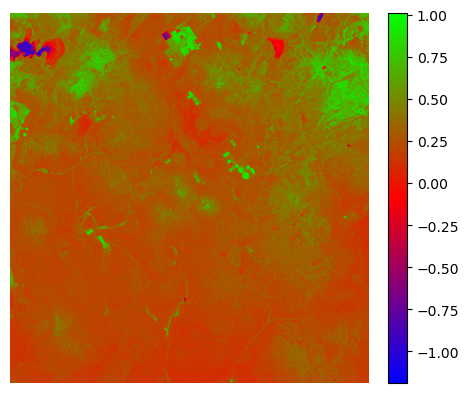

In [60]:
import matplotlib.pyplot as plt
plot = plt.imshow(ndvi, cmap=plt.cm.brg)
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)